# Covid-19 India Active Cases Bar Chart Race

![Alt Text](https://raw.githubusercontent.com/hisham2k9/Share_files/master/active_cases.gif)

You can download video [Link here](https://link-url-here.org)<br>
You can downlaod the GIF [Link here](https://github.com/hisham2k9/Share_files/raw/master/active_cases.mp4)

In [6]:
#importing libraries
from pandas import Series
import datetime
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from operator import itemgetter

In [48]:
#getting data from hisham2k9.pythonanywhere.com
ncdf=pd.read_excel(r"https://hisham2k9.pythonanywhere.com/downloadexcel", sheet_name='newcase',skipfooter=1)
ddf=pd.read_excel(r"https://hisham2k9.pythonanywhere.com/downloadexcel", sheet_name='death',skipfooter=1)
rdf=pd.read_excel(r"https://hisham2k9.pythonanywhere.com/downloadexcel", sheet_name='recovery',skipfooter=1)

In [53]:
dic={'andaman_and_nicobar': 'AN', 'andhra_pradesh': 'AP', 'arunachal_pradesh': 'AR', \
     'assam': 'AS', 'bihar': 'BR', 'chandigarh': 'CH', 'chhattisgarh': 'CT', \
     'dadra_nagar_haveli_daman_n_diu': 'DN', 'delhi': 'DL', 'goa': 'GA', 'gujarat': 'GJ',\
     'himachal_pradesh': 'HP', 'haryana': 'HR', 'jharkhand': 'JH', 'jammu_and_kashmir': 'JK',\
     'karnataka': 'KA', 'kerala': 'KL', 'lakshadeep': 'LD', 'ladakh': 'LA', 'maharashtra': 'MH',
     'meghalaya': 'ML', 'manipur': 'MN', 'madhya_pradesh': 'MP', 'mizoram': 'MZ', 'nagaland': 'NL', \
     'odisha': 'OR', 'punjab': 'PB', 'puducherry': 'PY', 'rajasthan': 'RJ', 'sikkim': 'SK',\
     'tamil_nadu': 'TN', 'telangana': 'TG', 'tripura': 'TR', 'uttar_pradesh': 'UP',\
     'uttarakhand': 'UT', 'west_bengal': 'WB', 'total': 'TT'\
    }
states=sorted(latest,key=itemgetter(1),reverse=True)
c=0
stateslist=[]
while c<=16:
    stateslist.append(states[c][0])
    c=c+1


In [54]:
#Adding color combo
countries=['China', 'US', 'United Kingdom', 'Italy', 'France', 'Germany', 'Spain', 'Iran', 'India', 'Turkey',
               'Russia', 'Brazil', 'Canada', 'Belgium', 'Netherlands', 'Switzerland', 'Peru']
colors = dict(zip(
    stateslist,
    ['#FF6F61','#6B5B95','#88B04B','#F7CAC9','#92A8D1','#955251','#B565A7','#009B77',
'#DD4124','#D65076','#45B8AC','#EFC050','#5B5EA6','#9B2335','#DFCFBE',
'#55B4B0','#E15D44']))
#len(countries)

print(colors)

{'kerala': '#FF6F61', 'maharashtra': '#6B5B95', 'karnataka': '#88B04B', 'tamil_nadu': '#F7CAC9', 'andhra_pradesh': '#92A8D1', 'odisha': '#955251', 'assam': '#B565A7', 'mizoram': '#009B77', 'west_bengal': '#DD4124', 'manipur': '#D65076', 'telangana': '#45B8AC', 'uttarakhand': '#EFC050', 'meghalaya': '#5B5EA6', 'sikkim': '#9B2335', 'arunachal_pradesh': '#DFCFBE', 'tripura': '#55B4B0', 'nagaland': '#E15D44'}


In [57]:
#transfering clean data to a dataframe
newdata=[]
for item in data:
    if item[0]  in stateslist:
        pydate=pd.Timestamp.to_pydatetime(item[2]).date()
        newdata.append([item[0],item[1],pydate])
    
df=pd.DataFrame(columns=['Country','Cases','Date'],data=newdata)
print(df.tail())

          Country  Cases        Date
8852  west_bengal  11113  2021-07-31
8853  west_bengal  10974  2021-08-01
8854  west_bengal  10803  2021-08-02
8855  west_bengal  10767  2021-08-03
8856  west_bengal  10767  2021-08-04


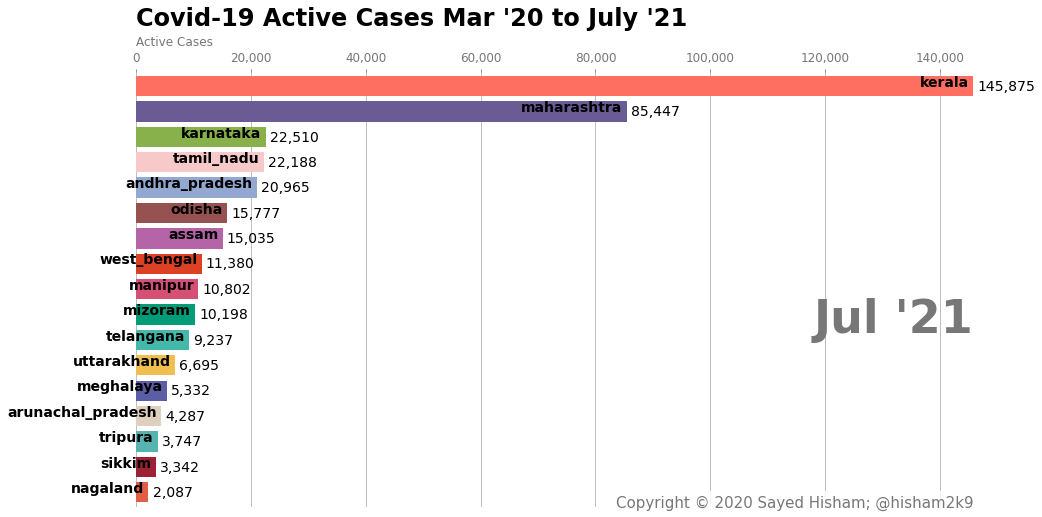

In [59]:
fig, pt = plt.subplots(figsize=(15, 8))

def barchart_race(current_year):
    #print(type(current_year))
    dff = df[df['Date'].eq(current_year)].sort_values(by='Cases', ascending=True).tail(18)
    #print(dff)
    pt.clear()
    #colors=[colors[x] for x in dff['Country']]
    #print('colors')
    #print(colors)
    pt.barh(dff['Country'], dff['Cases'], color=[colors[x] for x in dff['Country']])
    dx = dff['Cases'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Cases'], dff['Country'])):
        pt.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='baseline')
        pt.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    pt.text(1, 0.4, current_year.strftime("%b '%y"), transform=pt.transAxes, color='#777777', size=46, ha='right', weight=800)
    pt.text(0, 1.06, 'Active Cases', transform=pt.transAxes, size=12, color='#777777')
    pt.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    pt.xaxis.set_ticks_position('top')
    pt.tick_params(axis='x', colors='#777777', labelsize=12)
    pt.set_yticks([])
    pt.margins(0, 0.01)
    pt.grid(which='major', axis='x', linestyle='-')
    pt.set_axisbelow(True)
    pt.text(0, 1.15, "Covid-19 Active Cases Mar '20 to July '21",
            transform=pt.transAxes, size=24, weight=600, ha='left', va='top')
    pt.text(1, 0, 'Copyright © 2020 Sayed Hisham; @hisham2k9', transform=pt.transAxes,size=15, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
barchart_race((datetime.date(2021,7,27)))

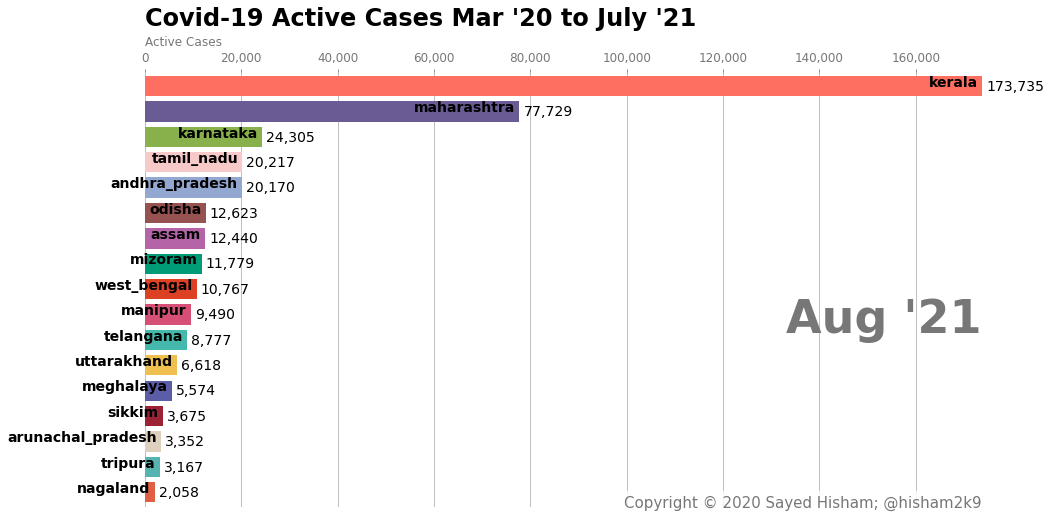

In [45]:
fig, pt = plt.subplots(figsize=(15, 8))
datelist=[]
for item in pd.date_range(start=datetime.date(2020,3,1),end=datetime.date(2021,8,3)):   #'MS' for monthly freq='W-SUN' for sun weekly
    datelist.append(item.date())
#print(datelist)
animator = animation.FuncAnimation(fig, barchart_race, 
                            frames=datelist)

HTML(animator.to_html5_video())
#HTML(animator.to_jshtml())
animator.save('video_test.mp4')

In [58]:
##THE END